In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, roc_auc_score, auc

%matplotlib inline
pd.set_option('display.max_columns', None)

## Import the data

In [5]:
from sklearn.datasets import load_breast_cancer

C:\Users\R7891\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
cancer = load_breast_cancer()

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['benign'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

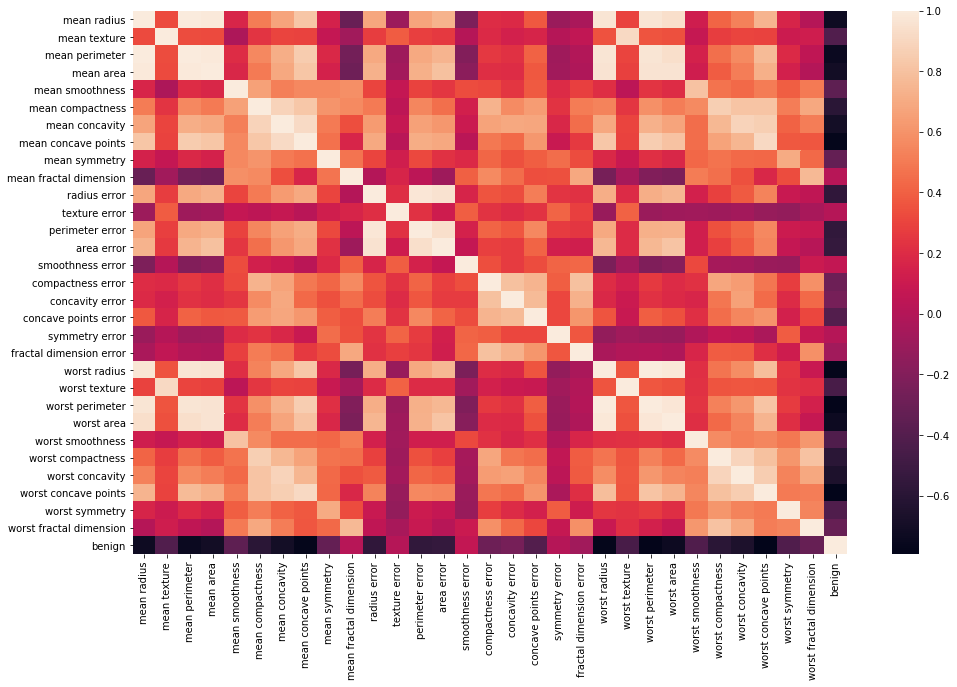

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

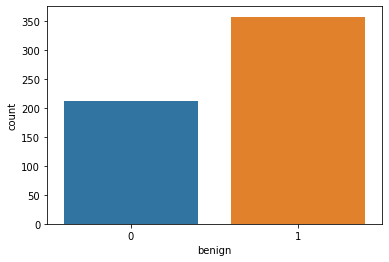

In [14]:
sns.countplot(x='benign', data=df)

In [15]:
df['benign'].value_counts()

1    357
0    212
Name: benign, dtype: int64

## AdaBoost

Cited from sklearn:

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. In AdaBoost, we would have two kind of weight; the observation weight and the classifier weight.

Using AdaBoost classifier, our target class would be always $y = \left\{1, -1\right\}$ where positive 1 is represent the positive class and negative 1 (-1) is represent the negative class. 

In AdaBoost, we could let the classifier equation as below:

$$ Gm(x) m=1,2,...,M$$ 

Where $Gm(x)$ is our boosted classifier and M is the sequence of our weak classifiers, and our objective is:

$$G(x)=sign(α_1G_1(x)+α_2G_2(x)+...α_MG_M(x))=sign(\sum_{m=1}^{M}α_mG_m(x))$$

where $α$ is the classifier weight, and sign is represent the positive or negative (depend on what class is predicted)

In the first step, Initialize the obervation weights $w_i=1/N$ for every observation on the data. 

for $m=1,2,...,M$

- Compute the weighted error $Err_m=\large\frac{\sum_{i=1}^{N}w_iI(y(i)≠Gm(x(i)))}{\sum_{i=1}^{N}w_i}$ , where we sum the weight of the misclassified data divided by the sum of all the data weight 
- Compute the estimator coefficient $α_m=L*log(\frac{1−err_m}{err_m})$ where $L≤1$ is the learning rate
- Set data weights $w_i←w_i*exp[α_mI(y(i)≠Gm(x(i)))]$ which mean if it is misclassified, the observed data would be updated as $\large w_i * e^{α_m}$ else it updated as $\large w_i * e^{-α_m}$
- Normalized the weight data in each step by $w_i←\frac{w_i}{\sum_{i=1}^{N}w_i}$

The expected output would be the sum of the classifier weight multiply by the predicted target class. For example if we have 3 classifier which predict 1, 1, -1. The sum would be 1, which mean the prediction would be the positive class, but if we the weight of the classifier is 0.3, 0.1, 1 then the sum would be 0.3 * 1 + 0.1 * 1 + 1 * -1 which equal to -0.6, then our prediction would come to the negative class 

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
best10 = df[df.corr()['benign'].sort_values(ascending=True).head(10).index]
best10['benign'] = cancer['target']
best10

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,worst concavity,benign
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0
...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0


In [21]:
dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=5, max_depth=1)

In [22]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME')

In [24]:
X = best10.drop('benign', axis=1)
y = best10['benign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [27]:
ada.feature_importances_

array([0.18698427, 0.22163256, 0.13712992, 0.02008301, 0.08499486,
       0.16721921, 0.        , 0.00898794, 0.06668694, 0.10628129])

In [28]:
adadf = pd.DataFrame({'features': X_train.columns, 'importances': ada.feature_importances_})
adadf.sort_values('importances', ascending=False, inplace=True)

In [29]:
adadf

,features,importances
1,worst perimeter,0.221633
0,worst concave points,0.186984
5,worst area,0.167219
2,mean concave points,0.137130
9,worst concavity,0.106281
4,mean perimeter,0.084995
8,mean concavity,0.066687
3,worst radius,0.020083
7,mean area,0.008988
6,mean radius,0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

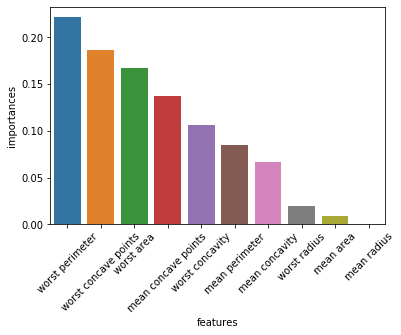

In [31]:
sns.barplot(x='features', y='importances', data=adadf)
plt.xticks(rotation=45)

In [34]:
ada.estimator_weights_

array([0.24245635, 0.2343393 , 0.22240316, 0.21854419, 0.20619698,
       0.19578849, 0.18523225, 0.17434762, 0.1731999 , 0.15615459,
       0.15265945, 0.14149331, 0.13735447, 0.13131714, 0.1230473 ,
       0.12027826, 0.10791068, 0.11736522, 0.10460084, 0.08241246,
       0.09622954, 0.0779016 , 0.09232614, 0.08412382, 0.07693581,
       0.06924223, 0.08221854, 0.07829777, 0.06904023, 0.08275208,
       0.07522467, 0.06153238, 0.07456566, 0.05863948, 0.06770484,
       0.0561334 , 0.06698958, 0.04964295, 0.06218503, 0.04796875,
       0.07361601, 0.05500055, 0.04974842, 0.06979835, 0.04294063,
       0.05191069, 0.04193036, 0.04964569, 0.04688699, 0.04843504,
       0.04056724, 0.04662776, 0.04501844, 0.04542518, 0.03919509,
       0.04401452, 0.03823266, 0.04270975, 0.04292901, 0.04174684,
       0.03688773, 0.04323054, 0.03614155, 0.03937196, 0.04108421,
       0.03831788, 0.03479847, 0.03767163, 0.033987  , 0.03668839,
       0.03889649, 0.03845932, 0.03323341, 0.03444495, 0.03799

In [35]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        49
           1       0.86      0.97      0.91        65

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



In [37]:
confusion_matrix(y_test, dt.predict(X_test))

array([[39, 10],
       [ 2, 63]], dtype=int64)

In [36]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.97      0.97      0.97        65

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [38]:
confusion_matrix(y_test, ada.predict(X_test))

array([[47,  2],
       [ 2, 63]], dtype=int64)

In [39]:
ada

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [40]:
param_grid = {
    "base_estimator__min_samples_split": [i for i in range(2,4)],
    "base_estimator__min_samples_leaf": [i for i in range(2,4)],
    "n_estimators": [10,20,50],
    "learning_rate": np.linspace(0.01, 0.1, 5)
}

ada_grid = GridSearchCV(estimator=ada, param_grid = param_grid, scoring='roc_auc', cv=3)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=1,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=5,
      

In [41]:
ada_grid.best_params_

{'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'learning_rate': 0.1,
 'n_estimators': 50}

In [42]:
ada_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [43]:
adagrid = ada_grid.best_estimator_

In [48]:
ada_grid.best_score_

0.9826578724099587

## Gradient Boosting

Gradient Boosting work like AdaBoost but include few differences. 

Gradient boosting involves three elements:

1. A loss function to be optimized.
1. A weak learner to make predictions.
1. An additive model to add weak learners to minimize the loss function.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gradient = GradientBoostingClassifier(learning_rate = 0.1, subsample=0.5, n_estimators=100)

In [51]:
gradient.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
gradient.oob_improvement_

array([ 1.45749560e-01,  1.25807415e-01,  9.47041018e-02,  8.33267337e-02,
        6.93235392e-02,  6.36658085e-02,  5.12072162e-02,  4.16812228e-02,
        3.74077536e-02,  2.89262980e-02,  2.87191845e-02,  2.44186270e-02,
        1.89391151e-02,  1.94978704e-02,  1.30281391e-02,  1.13053082e-02,
        1.59955963e-02,  9.41715651e-03,  1.10706171e-02,  8.16895780e-03,
        7.77103875e-03,  5.09978096e-03,  5.96775544e-03,  5.10670835e-03,
        2.05119292e-03,  4.89554141e-03,  1.83942938e-03,  4.07668599e-04,
        1.19600960e-03,  3.18184545e-03,  2.55989514e-03,  2.58599845e-03,
       -1.19255102e-04, -7.61372438e-04, -1.21410019e-03,  1.09668819e-04,
        5.69832427e-04, -1.38208744e-03, -9.40007054e-04,  2.83282503e-04,
       -1.16489912e-03,  1.68269608e-03,  7.60244231e-04, -1.72903501e-03,
       -5.63574756e-05,  1.03517069e-03, -5.08786066e-02, -4.04902780e-03,
        3.08354397e-05,  1.02587151e-04, -1.25969229e-03, -2.04716944e-03,
       -3.00010786e-03, -

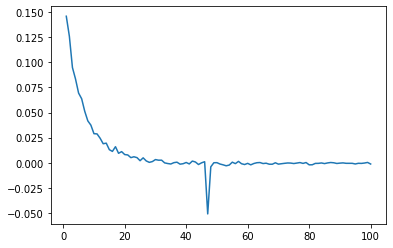

In [55]:
plt.plot(range(1,101), gradient.oob_improvement_)
plt.show()

In [56]:
print(classification_report(y_train, gradient.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       292

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [58]:
confusion_matrix(y_train, gradient.predict(X_train))

array([[163,   0],
       [  0, 292]], dtype=int64)

In [60]:
print(classification_report(y_test, gradient.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.97      0.98        65

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [61]:
confusion_matrix(y_test, gradient.predict(X_test))

array([[48,  1],
       [ 2, 63]], dtype=int64)

## Show All Decision Tree, Ada Boost and Gradient Boost ROC&AUC Score

In [62]:
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)

adagrid_pred = adagrid.predict(X_test)
adagrid_proba = adagrid.predict_proba(X_test)

gradient_pred = gradient.predict(X_test)
gradient_proba = gradient.predict_proba(X_test)

In [65]:
dtprob1 = dt_proba[:,1]
adagridprob1 = adagrid_proba[:,1]
gradprob1 = gradient_proba[:,1]

fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, dtprob1)
fpr_ada, tpr_ada, thres_ada = roc_curve(y_test, adagridprob1)
fpr_gr, tpr_gr, thres_gr = roc_curve(y_test, gradprob1)

roc_auc_dt1 = auc(fpr_dt, tpr_dt)
roc_auc_ada1 = auc(fpr_ada, tpr_ada)
roc_auc_gr1 = auc(fpr_gr, tpr_gr)

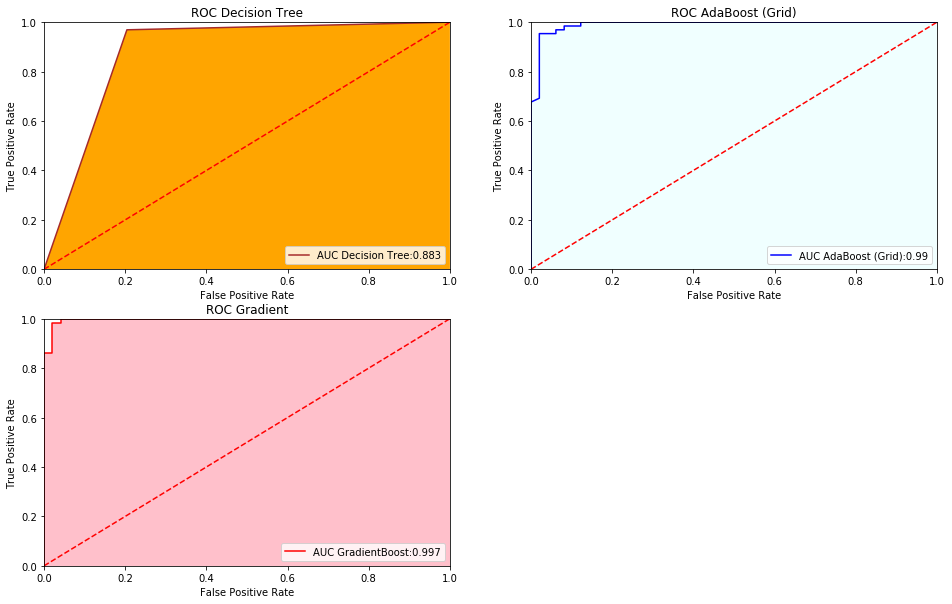

In [68]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Decision Tree')
plt.plot(fpr_dt, tpr_dt, 'brown', label = 'AUC Decision Tree:{}'.format(round(roc_auc_dt1,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dt, tpr_dt, 0, facecolor='orange', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC AdaBoost (Grid)')
plt.plot(fpr_ada, tpr_ada, 'blue', label = 'AUC AdaBoost (Grid):{}'.format(round(roc_auc_ada1,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_ada, tpr_ada, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(223)
plt.title('ROC Gradient')
plt.plot(fpr_gr, tpr_gr, 'red', label = 'AUC GradientBoost:{}'.format(round(roc_auc_gr1,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gr, tpr_gr, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')
plt.show()

# Principal Component Analysis

Let's discuss PCA! This isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm.

## PCA Review

Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data.


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
df2 = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [71]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
scaler = StandardScaler()
scaler.fit(df2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
scaled_data = scaler.transform(df2)

In [74]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [75]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=2) #konsekuensi dari 30 feature dikompres ke hanya 2 feature saja adalah semakin banyak informasi yg hilang

In [78]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
x_pca = pca.transform(scaled_data)

In [81]:
scaled_data.shape

(569, 30)

In [82]:
x_pca.shape

(569, 2)

In [83]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [84]:
dfpca = pd.DataFrame(x_pca)
dfpca['benign'] = cancer['target']
dfpca.head()

,0,1,benign
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

In [85]:
for c in dfpca.columns[0:2]:
    dfpca.rename({int(c): f'PC{int(c)+1}'}, axis=1,inplace=True)

In [86]:
dfpca

,PC1,PC2,benign
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


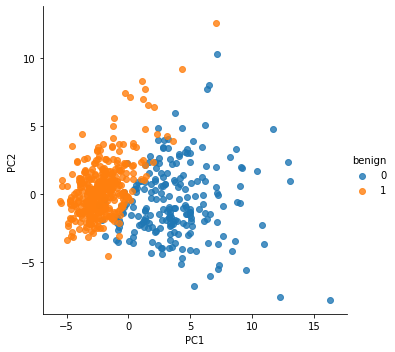

In [87]:
sns.lmplot(x='PC1', y='PC2', hue='benign', data=dfpca, fit_reg=False)

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [88]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [90]:
sum(pca.explained_variance_)

19.006365398100705

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [92]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'], index=['PC1', 'PC2'])

In [93]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


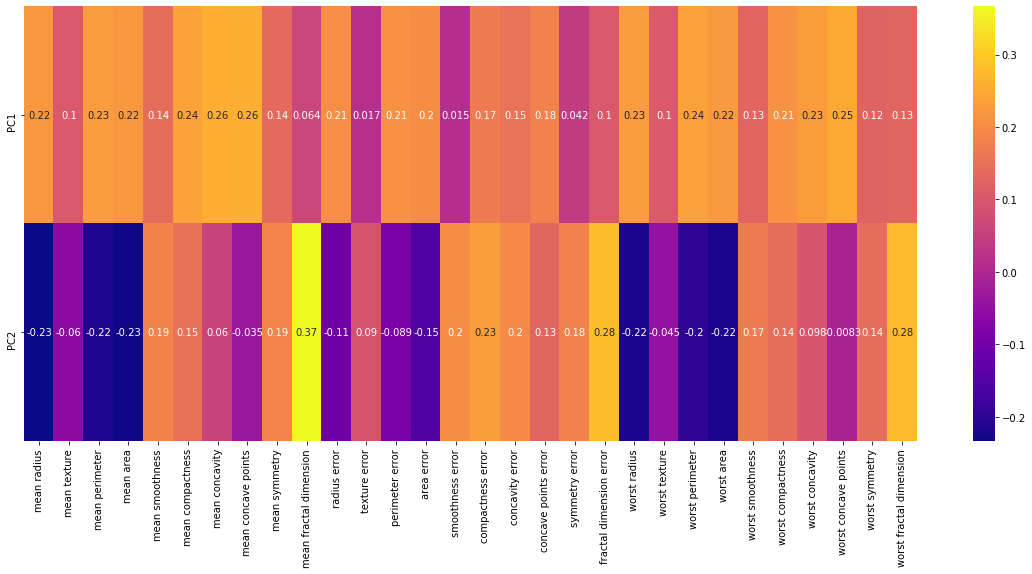

In [94]:
plt.figure(figsize=(20,8))
sns.heatmap(df_comp,cmap='plasma', annot=True)

In [95]:
dfpca['benign'].value_counts()

1    357
0    212
Name: benign, dtype: int64

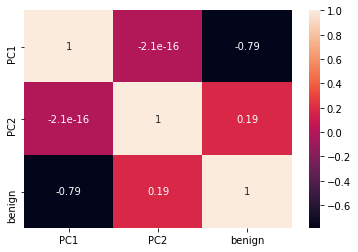

In [96]:
sns.heatmap(dfpca.corr(), annot=True)

In [97]:
contohx=[1,2,3,4,5,3,3,3,3,3]
contohy=[3,3,3,3,3,1,2,3,4,5]

listxy = []
for x,y in zip(contohx, contohy):
    listxy.append([x,y])
    
dfcontoh = pd.DataFrame(listxy, columns=['x', 'y'])
dfcontoh

,x,y
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
5,3,1
6,3,2
7,3,3
8,3,4
9,3,5


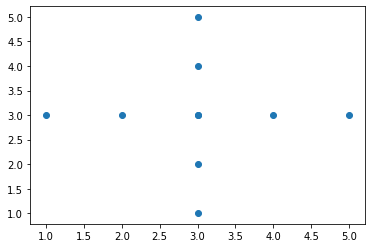

In [98]:
plt.scatter(dfcontoh['x'], dfcontoh['y'])

In [ ]:
dfcontoh.corr()